# Let's try to fit the borehole temperature data in ALHIC1902

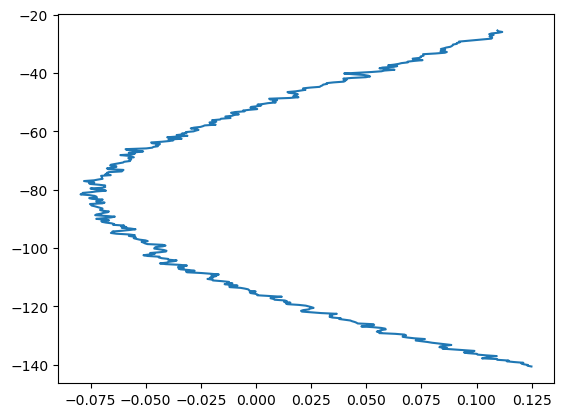

In [62]:
from heat import heat


import matplotlib.pyplot as plt
import pickle
import xarray as xr
from scipy.signal import filtfilt, butter, detrend
import numpy as np

filepath = '/data/fast1/jm-scratch/data_proc.pkl'

with open(filepath,'rb') as file:
    data = pickle.load(file)
    
borehole = data['ALHIC1902_23_5min']

z_data = np.array(borehole[0])
T_data = borehole[1].values

zmax = 554
zmin = 100
offset_trace = np.mean(T_data[zmin:zmax,:],axis=1)
plt.plot(detrend(offset_trace),-z_data[zmin:zmax])

# Simulations of the season cycle

In [134]:
start_year = 2003
end_year = 2023
number_of_time_steps = (end_year-start_year)*16 - 1
max_depth = 140
nz = 159

# Make a vector of times (units are in decimal years)
t = np.linspace(start_year,end_year, number_of_time_steps+1)

# Force the temperature at the surface to follow a sinusoidal pattern corresponding to an annual fluctuation, 
# plus a mean annual background temperature
mean_annual_T = -31.5
seasonal_dT = 40
t_surf= mean_annual_T* np.ones(number_of_time_steps+1) + seasonal_dT*np.sin(np.pi*2*t)

U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,
             nt=number_of_time_steps,
             zmax=max_depth,nz=nz,
             accumulation=5,
             dTdz = 0.035)


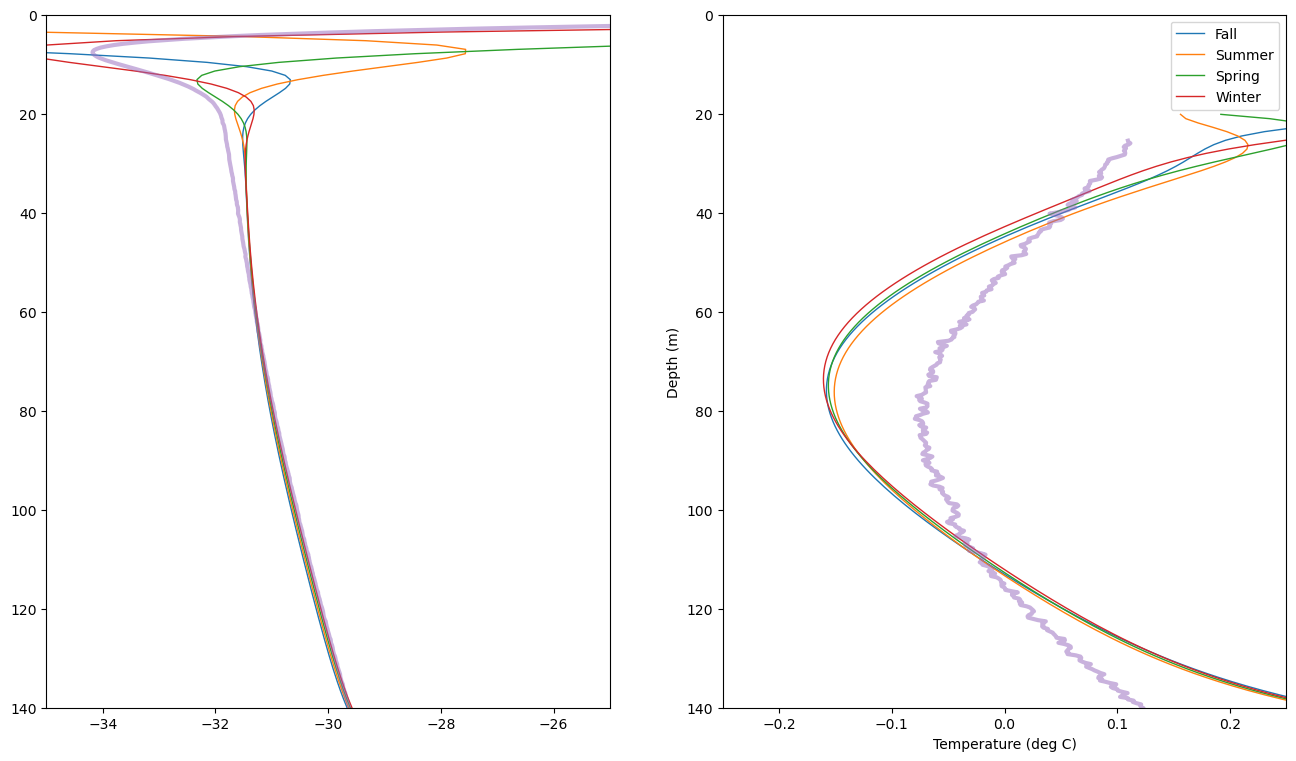

In [135]:
from scipy.signal import detrend
fig,ax=plt.subplots(1,2,figsize=(16,9))

plot_detrend=0

for plot_detrend in (0,1):
    if plot_detrend:
#         for i in range(1,16):
#             ax[plot_detrend].plot(detrend(U[:,-i]),z,c='lightgrey')
        z_min_model=20
        ax[plot_detrend].plot(detrend(U[:,-1][z>z_min_model]),z[z>z_min_model],label=f'Fall',linewidth=1)
        ax[plot_detrend].plot(detrend(U[:,-5][z>z_min_model]),z[z>z_min_model],label=f'Summer',linewidth=1)
        ax[plot_detrend].plot(detrend(U[:,-9][z>z_min_model]),z[z>z_min_model],label=f'Spring',linewidth=1)
        ax[plot_detrend].plot(detrend(U[:,-13][z>z_min_model]),z[z>z_min_model],label=f'Winter',linewidth=1)
        
        zmax = 554
        zmin = 100
        offset_trace = np.mean(T_data[zmin:zmax,:],axis=1)
        
        ax[plot_detrend].plot(detrend(offset_trace),z_data[zmin:zmax],linewidth=3,alpha=0.5)
        ax[plot_detrend].set_xlim([-0.25,0.25])
    else:
#         for i in range(1,16):
#             ax[plot_detrend].plot((U[:,-i]),z,c='lightgrey')
        ax[plot_detrend].plot((U[:,-1]),z,label=f'Fall',linewidth=1)
        ax[plot_detrend].plot((U[:,-5]),z,label=f'Summer',linewidth=1)
        ax[plot_detrend].plot((U[:,-9]),z,label=f'Spring',linewidth=1)
        ax[plot_detrend].plot((U[:,-13]),z,label=f'Winter',linewidth=1)
        
        zmax = 554
        zmin = 0
        offset_trace = np.mean(T_data[zmin:zmax,:],axis=1)
        ax[plot_detrend].plot((offset_trace),z_data[zmin:zmax],linewidth=3,alpha=0.5)
        ax[plot_detrend].set_xlim([-35,-25])
        
    ax[plot_detrend].set_ylim([max_depth,0])

plt.legend()
plt.ylabel('Depth (m)')

plt.xlabel('Temperature (deg C)')
plt.show()